# Test the fine-tuning approach by training on some properties and testing on others

In [9]:
%reload_ext autoreload
%autoreload 2

In [44]:
from gpt3forchem.extrapolation.create_prompts import create_prompts
from gpt3forchem.extrapolation.data import get_data

from sklearn.model_selection import train_test_split

from gpt3forchem.fine_tune import fine_tune

import time

from gpt3forchem.query_model import query_gpt3

In [51]:
data = get_data()

In [80]:
TRAIN_PROPERTIES = [
    "CO2 Henry coefficient_binned",
    "N2 Henry coefficient_binned",
    "CH4 Henry coefficient_binned",
    "O2 Henry coefficient_binned",
    "Xe Henry coefficient_binned",
    "Kr Henry coefficient_binned",
   # "outputs.pbe.bandgap_binned",
     "H2S Henry coefficient_binned",
        #  "H2O Henry coefficient_binned",
]

In [81]:
VALIDATION_PROPERTIES = [
 "H2O Henry coefficient_binned",
]

In [93]:
train_data, test_data = train_test_split(data, test_size=0.1)

In [94]:
train_prompts = create_prompts(train_data, TRAIN_PROPERTIES)
valid_prompts_new_appl = create_prompts(test_data, VALIDATION_PROPERTIES)
valid_prompts_old_appl = create_prompts(test_data, TRAIN_PROPERTIES)

In [95]:
valid_prompts_new_appl

,prompt,completion
0,"what is the Henry coefficient of H2O (water), ...",2@@@
1,"what is the Henry coefficient of H2O (water), ...",0@@@
2,"what is the Henry coefficient of H2O (water), ...",2@@@
3,"what is the Henry coefficient of H2O (water), ...",4@@@


In [96]:
train_size = len(train_prompts)
test_size = len(valid_prompts_new_appl)

In [97]:
len(valid_prompts_new_appl)

4

In [98]:
filename_base = time.strftime("%Y-%m-%d-%H-%M-%S", time.localtime())
train_filename = f"run_files/{filename_base}_train_mof_mulitoutput_{train_size}.jsonl"
valid_filename = f"run_files/{filename_base}_valid_mof_mulitoutput_{test_size}.jsonl"
# to save money, just run a small valid frame
valid_small_filename = f"run_files/{filename_base}_validsmall_mof_mulitoutput_{test_size}.jsonl"
train_prompts.to_json(train_filename, orient="records", lines=True)
valid_prompts_new_appl.to_json(valid_filename, orient="records", lines=True)

In [99]:
fine_tune(train_filename, valid_filename)

Upload progress: 100%|██████████| 93.8k/93.8k [00:00<00:00, 48.3Mit/s]


Uploaded file from run_files/2022-07-21-14-30-09_train_mof_mulitoutput_404.jsonl: file-VVIJSJSF9myOg2WlSrW2J6CL


Upload progress: 100%|██████████| 1.54k/1.54k [00:00<00:00, 716kit/s]


Uploaded file from run_files/2022-07-21-14-30-09_valid_mof_mulitoutput_4.jsonl: file-BLXvonHFcQmFKmZTIlR80AMV
Created fine-tune: ft-caQjl9QayDJtnCXuM8fu1c7R
Streaming events until fine-tuning is complete...

(Ctrl-C will interrupt the stream, but not cancel the fine-tune)
[2022-07-21 14:30:14] Created fine-tune: ft-caQjl9QayDJtnCXuM8fu1c7R
[2022-07-21 14:30:20] Fine-tune costs $0.07
[2022-07-21 14:30:21] Fine-tune enqueued. Queue number: 0
[2022-07-21 14:30:24] Fine-tune started
[2022-07-21 14:31:36] Completed epoch 1/4
[2022-07-21 14:32:33] Completed epoch 2/4
[2022-07-21 14:33:30] Completed epoch 3/4
[2022-07-21 14:34:28] Completed epoch 4/4
[2022-07-21 14:34:46] Uploaded model: ada:ft-epfl-2022-07-21-12-34-46
[2022-07-21 14:34:47] Uploaded result file: file-DhBv2oqU40iqR9JgeR5uTKm7
[2022-07-21 14:34:47] Fine-tune succeeded

Job complete! Status: succeeded 🎉
Try out your fine-tuned model:

openai api completions.create -m ada:ft-epfl-2022-07-21-12-34-46 -p <YOUR_PROMPT>


wandb: Currently logged in as: kjappelbaum. Use `wandb login --relogin` to force relogin
wandb: wandb version 0.12.21 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade
wandb: Tracking run with wandb version 0.12.19
wandb: Run data is saved locally in /Users/kevinmaikjablonka/git/kjappelbaum/gpt3forchem/experiments/extrapolation/wandb/run-20220721_143452-ft-caQjl9QayDJtnCXuM8fu1c7R
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run ft-caQjl9QayDJtnCXuM8fu1c7R
wandb: ⭐️ View project at https://wandb.ai/kjappelbaum/GPT-3
wandb: 🚀 View run at https://wandb.ai/kjappelbaum/GPT-3/runs/ft-caQjl9QayDJtnCXuM8fu1c7R
wandb: Waiting for W&B process to finish... (success).
wandb:                                                                                


🎉 wandb sync completed successfully


wandb: 
wandb: Run history:
wandb:             elapsed_examples ▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
wandb:               elapsed_tokens ▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
wandb:                training_loss █▅▂▂▂▃▃▂▂▁▂▃▁▂▃▁▂▂▂▁▂▂▂▁▁▂▂▂▁▁▂▂▃▁▁▂▁▂▁▁
wandb:   training_sequence_accuracy █▁▁███▁▁██▁▁█████▁██▁█▁██▁▁██▁▁█▁██▁████
wandb:      training_token_accuracy █▁▁███▁▁██▁▁█████▁██▁█▁██▁▁██▁▁█▁██▁████
wandb:              validation_loss █▂▂▃▂▁▂▁▂▁▁▂▃▁▁▁▂▁▁▂▂▁▁▁▁▂▁▂▂▁▁▂▃▂▁▁▃▂▁▁
wandb: validation_sequence_accuracy ▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁█▁▁▁██▁▁▁█▁▁▁
wandb:    validation_token_accuracy ▁▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆█▆▆▆██▆▆▆█▆▆▆
wandb: 
wandb: Run summary:
wandb:             elapsed_examples 1617.0
wandb:               elapsed_tokens 191569.0
wandb:             fine_tuned_model ada:ft-epfl-2022-07-...
wandb:                       status succeeded
wandb:                training_loss 0.00809
wandb:   training_sequence_accuracy 1.0
wandb:      training_token_accuracy 1.0
wandb:    

In [34]:
! openai api fine_tunes.follow -i  ft-R60sZ2aGlOZgq6elnoaCmwjJ

[2022-07-21 11:05:12] Created fine-tune: ft-R60sZ2aGlOZgq6elnoaCmwjJ
[2022-07-21 11:05:39] Fine-tune costs $0.31
[2022-07-21 11:05:40] Fine-tune enqueued. Queue number: 0
[2022-07-21 11:05:42] Fine-tune started
[2022-07-21 11:10:17] Completed epoch 1/4
[2022-07-21 11:14:36] Completed epoch 2/4
[2022-07-21 11:18:58] Completed epoch 3/4
[2022-07-21 11:23:19] Completed epoch 4/4
[2022-07-21 11:23:40] Uploaded model: ada:ft-epfl-2022-07-21-09-23-40
[2022-07-21 11:23:41] Uploaded result file: file-BLARPdU25ZcUSy4TYt9idWNR
[2022-07-21 11:23:41] Fine-tune succeeded

Job complete! Status: succeeded 🎉
Try out your fine-tuned model:

openai api completions.create -m ada:ft-epfl-2022-07-21-09-23-40 -p <YOUR_PROMPT>


In [100]:
completions = query_gpt3("ada:ft-epfl-2022-07-21-12-34-46", valid_prompts_new_appl)

In [101]:
valid_prompts_new_appl['completion'].values

array([' 2@@@', ' 0@@@', ' 2@@@', ' 4@@@'], dtype=object)

In [102]:
completions

[<OpenAIObject text_completion id=cmpl-5WQHZ7ciLZ2OJCWvC3MswudjFNXP8 at 0x16a0005e0> JSON: {
   "choices": [
     {
       "finish_reason": "length",
       "index": 0,
       "logprobs": null,
       "text": " 1@@@ 1@@@ 1@@@ 1"
     }
   ],
   "created": 1658409209,
   "id": "cmpl-5WQHZ7ciLZ2OJCWvC3MswudjFNXP8",
   "model": "ada:ft-epfl-2022-07-21-12-34-46",
   "object": "text_completion",
   "usage": {
     "completion_tokens": 10,
     "prompt_tokens": 313,
     "total_tokens": 323
   }
 },
 <OpenAIObject text_completion id=cmpl-5WQHesaPEHhQCTLCieeWOEBzGpiIF at 0x16a000130> JSON: {
   "choices": [
     {
       "finish_reason": "length",
       "index": 0,
       "logprobs": null,
       "text": " 0@@@1@@@1@@@1"
     }
   ],
   "created": 1658409214,
   "id": "cmpl-5WQHesaPEHhQCTLCieeWOEBzGpiIF",
   "model": "ada:ft-epfl-2022-07-21-12-34-46",
   "object": "text_completion",
   "usage": {
     "completion_tokens": 10,
     "prompt_tokens": 241,
     "total_tokens": 251
   }
 },
 <Ope

/Users/kevinmaikjablonka/miniconda3/envs/gpt3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/kevinmaikjablonka/miniconda3/envs/gpt3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/kevinmaikjablonka/miniconda3/envs/gpt3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword w

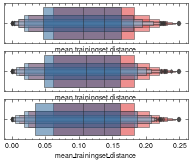

In [ ]:
fig, ax = plt.subplots(3,1, sharex="all")

for i in range(3):
    sns.boxenplot(df_valid_distances['mean_trainingset_distance'],  ax=ax[i], color='r', )


sns.boxenplot(df_metrics_0['mean_trainingset_distance'],ax=ax[0])
sns.boxenplot(df_metrics_05['mean_trainingset_distance'],  ax=ax[1])
sns.boxenplot(df_metrics_1['mean_trainingset_distance'], ax=ax[2])



for a in ax:
    plt.setp(a.collections, alpha=.5)

/Users/kevinmaikjablonka/miniconda3/envs/gpt3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/kevinmaikjablonka/miniconda3/envs/gpt3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/kevinmaikjablonka/miniconda3/envs/gpt3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword w

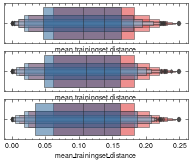

In [ ]:
fig, ax = plt.subplots(3,1, sharex="all")

for i in range(3):
    sns.boxenplot(df_valid_distances['mean_trainingset_distance'],  ax=ax[i], color='r', )


sns.boxenplot(df_metrics_0['mean_trainingset_distance'],ax=ax[0])
sns.boxenplot(df_metrics_05['mean_trainingset_distance'],  ax=ax[1])
sns.boxenplot(df_metrics_1['mean_trainingset_distance'], ax=ax[2])



for a in ax:
    plt.setp(a.collections, alpha=.5)